In [2]:
import numpy as np
from pytz import timezone
from datetime import datetime
import matplotlib.pyplot as plt

TZ = timezone('Europe/Moscow')

import sys
import os


sys.path.append(os.path.abspath('./'))

from env_move_wall import HumanMoveAroundWallAction

In [2]:

seed = int( datetime.now(TZ).strftime("%H%M%S") )
print(seed)

env = HumanMoveAroundWallAction(render_mode = 'human',
                            seed=seed,
                           )

total_reward = 0.
step_reward = []
angle_step_reward = []
speed_step_reward = []
view_step_reward = []
stoper_step_reward = []
obstacle_stop_reward = []
obstacle_move_reward = []

observation, info = env.reset(seed=seed)
# course move, speed


for tick in range(800):

    action = env.teach_action()
    #if tick > 30:
    #№action = np.array([0.,0.5,0])

    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation, info = env.reset()
        step_reward.append(reward)
        total_reward += reward
        print('BREAK')
        break
    
    step_reward.append(reward)
    total_reward += reward

    rews = env.get_rewards()
    angle_step_reward.append(rews['angle_reward'])
    speed_step_reward.append(rews['speed_reward'])
    view_step_reward.append(rews['view_reward'] )
    stoper_step_reward.append(rews['stoped_reward'])
    obstacle_stop_reward.append(rews['object_stop'])
    obstacle_move_reward.append(rews['object_move'])

print(len(step_reward))
print(total_reward)

134717


KeyboardInterrupt: 

In [ ]:
step_reward

In [4]:
env.close()

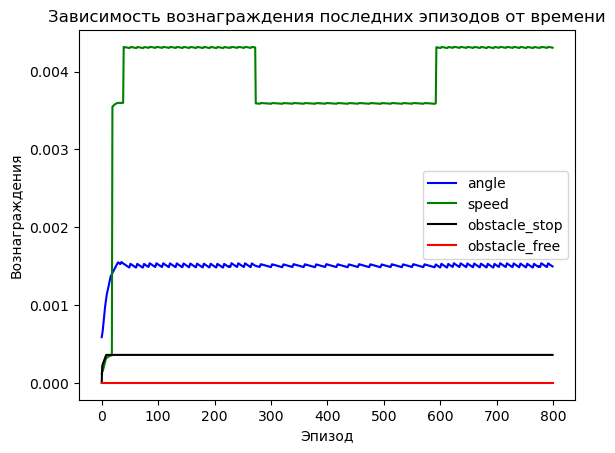

In [3]:
#plt.plot(step_reward[:-5])
plt.plot(angle_step_reward,color='b')
plt.plot(speed_step_reward,color='g')
#plt.plot(view_step_reward)
#plt.plot(stoper_step_reward, color='black')
plt.plot(obstacle_stop_reward,color='black')
plt.plot(obstacle_move_reward,color='r')
plt.legend(['angle','speed','obstacle_stop','obstacle_free'])
plt.title('Зависимость вознаграждения последних эпизодов от времени')
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждения')
plt.show()

In [7]:
from env_move_wall import HumanMoveAroundWallAction
from stable_baselines3 import DQN, SAC, PPO
from typing import Any, Dict, Tuple, Union
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import Logger, Video
from moviepy.editor import ImageSequenceClip
import torch
import numpy as np

DQN_path = "../teached/"

tmp_path = DQN_path + "model"

seed = int( datetime.now(TZ).strftime("%H%M%S") )
env = HumanMoveAroundWallAction(render_mode = 'rgb_array', continuous=True, seed=seed)
model = PPO.load(tmp_path, env)

logger = Logger(folder = DQN_path, output_formats=["mp4"])

#Video
screens = []

def grab_screens(_locals: Dict[str, Any], _globals: Dict[str, Any]) -> None:
    """
    Renders the environment in its current state, recording the screen in the captured `screens` list

    :param _locals: A dictionary containing all local variables of the callback's scope
    :param _globals: A dictionary containing all global variables of the callback's scope
    """
    screen = env.render()
    screens.append(screen)

evaluate_policy(
    model,
    env,
    callback=grab_screens,
    n_eval_episodes=1,
    deterministic=True,
)

#logger.record(
#    "video",
#    Video(torch.from_numpy(np.asarray([screens])), fps=30),
#    exclude=("stdout", "log", "json", "csv"),
#)

# Generate a sequence of frames
clip = ImageSequenceClip(screens[:-1], fps=120)
clip.write_videofile('output.mp4')

Moviepy - Building video output.mp4.
Moviepy - Writing video output.mp4



Moviepy - Done !
Moviepy - video ready output.mp4
